# Simple Bayesian analysis inference of coronavirus infection rate from the Stanford study in Santa Clara county

This is a re-implementation of [this post](https://statmodeling.stat.columbia.edu/2020/05/01/simple-bayesian-analysis-inference-of-coronavirus-infection-rate-from-the-stanford-study-in-santa-clara-county/) using pyMC3.

In [27]:
import pymc3 as pm

def get_model(y_sample_obs, n_sample, y_spec_obs, n_spec, y_sens_obs, n_sens):
    model = pm.Model()
    with model:
        p = pm.Uniform("p", 0, 1)
        spec = pm.Uniform("spec", 0, 1)
        sens = pm.Uniform("sens", 0, 1)
        y_spec = pm.Binomial("y_spec", n_spec, spec, observed=y_spec_obs)
        y_sens = pm.Binomial("y_sens", n_sens, sens, observed=y_sens_obs)
        
        p_sample = p * sens + (1 - p) * (1 - spec)
        y_sample = pm.Binomial("y_sample", n_sample, p_sample, observed=y_sample_obs)
    return model

## First Paper

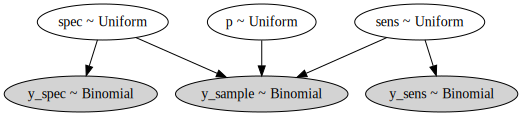

In [20]:
# Using data from Bendavid et al. paper of 11 Apr 2020

model = get_model(50, 3330, 369+30, 371+30, 25+78, 37+85)
pm.model_to_graphviz(model)

logp = -6.7438, ||grad|| = 2.4947: 100%|██████████| 30/30 [00:00<00:00, 2866.99it/s]  
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sens]
>Metropolis: [spec]
>Metropolis: [p]
Sampling 4 chains, 0 divergences: 100%|██████████| 42000/42000 [00:07<00:00, 5817.32draws/s]
The number of effective samples is smaller than 10% for some parameters.


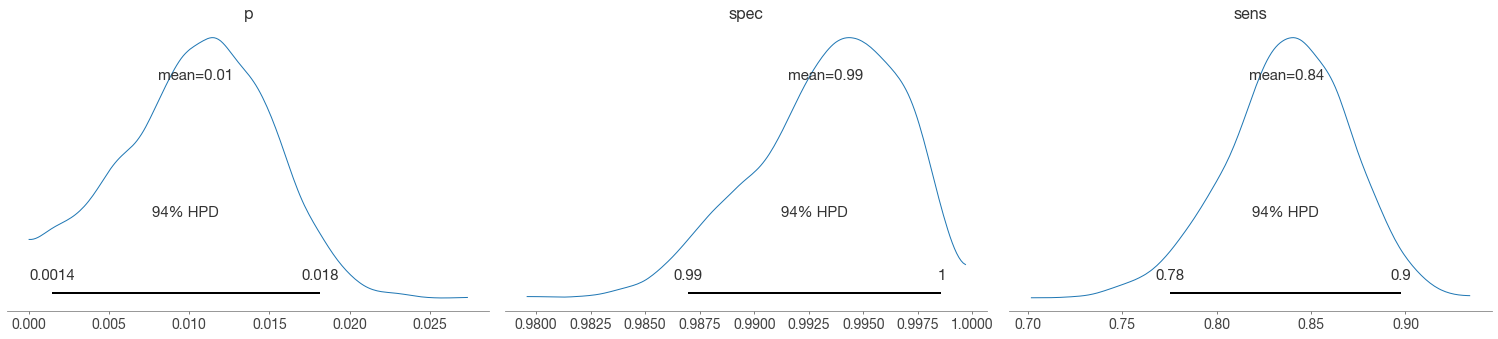

In [24]:
with model:
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(10000, start=start, step=step)
    
pm.plots.plot_posterior(trace[:5000]);

## Second Paper

logp = -8.406, ||grad|| = 4.3303: 100%|██████████| 19/19 [00:00<00:00, 3827.47it/s]  
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sens]
>Metropolis: [spec]
>Metropolis: [p]
Sampling 4 chains, 0 divergences: 100%|██████████| 42000/42000 [00:06<00:00, 6081.98draws/s]
The number of effective samples is smaller than 25% for some parameters.


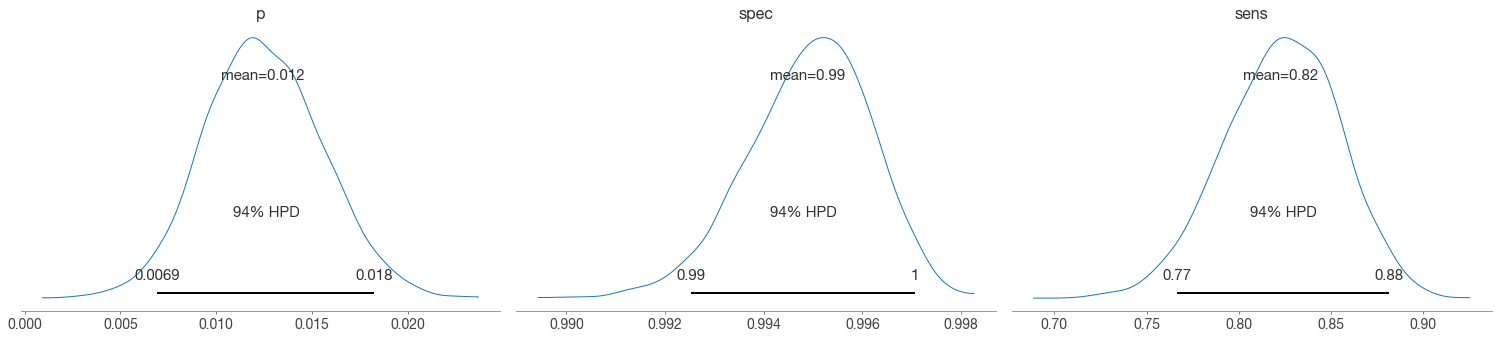

In [25]:
# Using data from Bendavid et al. paper of 27 Apr 2020

with get_model(50, 3330, 3308, 3324, 130, 157):
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(10000, start=start, step=step)
    
pm.plots.plot_posterior(trace[:5000]);